Q1 tip의 선형회귀분석 진행(머신러닝)
1. 데이터 수집
2. 데이터 분석 및 준비

- 카테고리 데이터는 원핫 인코딩 방식과 라벨 인코딩 방식

3. 학습
4. 테스트 및 검증


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
d1 = pd.get_dummies(df)
d1

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [ ]:
d2 = df.copy()
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
for i in d2.columns.to_list():   # d2에 있는 컬럼 하나씩하나씩
    if d2[i].dtype == 'category': #만약 타입이 카테고리면 (dtype 출력 = 문자열)
        d2[i].replace(np.unique(d2[i]), range(len(np.unique(d2[i]))), inplace = True)
d2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [ ]:
X1 = d1.drop(['tip'], axis = 1)
y1 = d1['tip']

In [ ]:
X2 = d2.drop(['tip'], axis = 1)
y2 = d2['tip']

X1

In [ ]:
s_1 = MinMaxScaler()
s_X1 = s_1.fit_transform(X1)
s_X1

array([[0.29157939, 0.2       , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.1522832 , 0.4       , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.3757855 , 0.4       , 1.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.41055718, 0.2       , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.30896523, 0.2       , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32907415, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(s_X1, y1.values, random_state = 1, train_size = 0.7)
train_x1.shape, test_x1.shape, train_y1.shape, test_y1.shape

((170, 12), (74, 12), (170,), (74,))

In [ ]:
# 언더피팅
m1 = LinearRegression()
m1.fit(train_x1, train_y1)
m1.score(train_x1, train_y1), m1.score(test_x1, test_y1)

(0.4855610099055696, 0.41637377433032396)

In [ ]:
# 오버피팅
from sklearn.tree import DecisionTreeRegressor
m1_1 = DecisionTreeRegressor()
m1_1.fit(train_x1, train_y1)
m1_1.score(train_x1, train_y1), m1_1.score(test_x1, test_y1)

(1.0, 0.48788938300578455)

In [ ]:
# 언더피팅
from sklearn.neighbors import KNeighborsRegressor
m1_2 = KNeighborsRegressor()
m1_2.fit(train_x1, train_y1)
m1_2.score(train_x1, train_y1), m1_2.score(test_x1, test_y1)

(0.5631504871357376, 0.1968235515857918)

X2

In [ ]:
s_2 = MinMaxScaler()
s_X2 = s_2.fit_transform(X2)
s_X2

array([[0.29157939, 0.        , 0.        , 0.66666667, 0.        ,
        0.2       ],
       [0.1522832 , 1.        , 0.        , 0.66666667, 0.        ,
        0.4       ],
       [0.3757855 , 1.        , 0.        , 0.66666667, 0.        ,
        0.4       ],
       ...,
       [0.41055718, 1.        , 1.        , 0.33333333, 0.        ,
        0.2       ],
       [0.30896523, 1.        , 0.        , 0.33333333, 0.        ,
        0.2       ],
       [0.32907415, 0.        , 0.        , 1.        , 0.        ,
        0.2       ]])

In [ ]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(s_X2, y2.values, random_state = 1, test_size = 0.3)
train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape

((170, 6), (74, 6), (170,), (74,))

In [ ]:
# 언더피팅
m2 = LinearRegression()
m2.fit(train_x2, train_y2)
m2.score(train_x2, train_y2), m2.score(test_x2, test_y2)

(0.48492148572690674, 0.4181513798093218)

In [ ]:
# 오버피팅
from sklearn.tree import DecisionTreeRegressor
m2_1 = DecisionTreeRegressor()
m2_1.fit(train_x2, train_y2)
m2_1.score(train_x2, train_y2), m2_1.score(test_x2, test_y2)

(1.0, 0.5396180819377396)

In [ ]:
# 언더피팅
from sklearn.neighbors import KNeighborsRegressor
m2_2 = KNeighborsRegressor()
m2_2.fit(train_x2, train_y2)
m2_2.score(train_x2, train_y2), m2_2.score(test_x2, test_y2)

(0.5644419220235006, 0.2235685236799273)

In [ ]:
from sklearn.linear_model import SGDRegressor
t_m1 = SGDRegressor(max_iter = 1000000, tol = 0.0000001)
t_m1.fit(train_x1, train_y1)
t_m1.score(train_x1, train_y1), t_m1.score(test_x1, test_y1)

(0.47004517127416734, 0.40906543860784794)

In [ ]:
from logging import lastResort
from sklearn.linear_model import Lasso,Ridge
t_m1_l = Lasso()
t_m1_l.fit(train_x1, train_y1)
t_m1_l.score(train_x1, train_y1), t_m1_l.score(test_x1, test_y1)

(0.0, -0.012893512722860434)

In [ ]:
t_m1_r = Ridge()
t_m1_r.fit(train_x1, train_y1)
t_m1_r.score(train_x1, train_y1), t_m1_r.score(test_x1, test_y1)

(0.47526064790537736, 0.4059883883275688)

In [ ]:
df = pd.read_csv("data3.csv")
X = df['X'].values.reshape(-1, 1)
y = df['y']

In [ ]:
tr_x, tt_x, tr_y, tt_y = train_test_split(X, y, random_state = 1)
tr_x.shape, tt_x.shape, tr_y.shape, tt_y.shape

((42, 1), (14, 1), (42,), (14,))

In [ ]:
lm = LinearRegression()
lm.fit(tr_x, tr_y)
lm.score(tr_x, tr_y), lm.score(tt_x, tt_y)

(0.921150162087582, 0.8801532075437282)

In [ ]:
lm.coef_, lm.intercept_

(array([35.66048008]), -618.6522360150107)

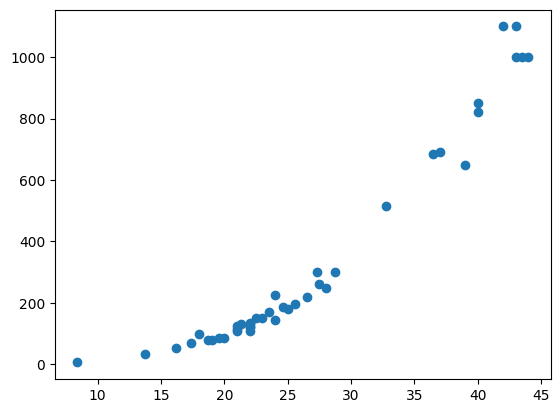

In [ ]:
plt.scatter(tr_x, tr_y)
plt.show()

In [ ]:
tr_x.min(), tr_x.max()

(8.4, 44.0)

In [ ]:
lm.predict([[tr_x.min()]])

array([-319.10420335])

In [ ]:
lm.predict([[tr_x.max()]])

array([950.40888748])

In [ ]:
n_tr_x = np.column_stack((tr_x ** 2, tr_x))
n_tt_x = np.column_stack((tt_x ** 2, tt_x))

In [ ]:
n_lm = LinearRegression()
n_lm.fit(n_tr_x, tr_y)
n_lm.score(n_tr_x, tr_y), n_lm.score(n_tt_x, tt_y)

(0.9850904775950469, 0.9103276736107344)

In [ ]:
n_lm.coef_

array([  1.00869625, -23.37339651])

In [ ]:
n_lm.intercept_

156.30384190915487

In [ ]:
tr_x[:, 0]

array([21. , 16.2, 24. , 43. , 28.7, 24.6, 39. , 43.5, 25. , 28. , 21.3,
       23. , 40. , 27.3, 22. , 42. , 27.5, 23.5, 17.4, 22. , 26.5, 25.6,
       40. , 36.5, 22. , 44. , 22.5, 24. , 18.7, 19. , 43. , 13.7, 22. ,
        8.4, 22. , 18. , 21. , 20. , 19.6, 21. , 37. , 32.8])

In [ ]:
d = list(tr_x[:, 0])
d.sort()
d

In [ ]:
lm = LinearRegression()
lm.fit(tr_x, tr_y)
lm.score(tr_x, tr_y), lm.score(tt_x, tt_y)

(0.921150162087582, 0.8801532075437282)

In [ ]:
sdg_lm = SGDRegressor(max_iter = 10000, shuffle = False)
sdg_lm.fit(tr_x, tr_y)
sdg_lm.score(tr_x, tr_y), sdg_lm.score(tt_x, tt_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(0.9173266822839725, 0.8865652615804793)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
p_m = PolynomialFeatures(include_bias = False)
p_m.fit(tr_x)
p_tr_x = p_m.transform(tr_x)
p_tt_x = p_m.transform(tt_x)

In [ ]:
lm = LinearRegression()
lm.fit(p_tr_x, tr_y)
lm.score(p_tr_x, tr_y), lm.score(p_tt_x, tt_y)

(0.9850904775950469, 0.9103276736107345)

In [ ]:
lm = Lasso()
lm.fit(p_tr_x, tr_y)
lm.score(p_tr_x, tr_y), lm.score(p_tt_x, tt_y)

(0.985084578356903, 0.9105205321469103)

In [ ]:
X = pd.read_csv("data2.csv").to_numpy()
X

In [ ]:
len(X)

56

In [ ]:
y=np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0])

In [ ]:
len(y)

56

In [ ]:
tr_x, tt_x, tr_y, tt_y = train_test_split(X, y, random_state = 10)
tr_x.shape, tt_x.shape, tr_y.shape, tt_y.shape

((42, 3), (14, 3), (42,), (14,))

In [ ]:
lm = LinearRegression()
lm.fit(tr_x, tr_y)
lm.score(tr_x, tr_y), lm.score(tt_x, tt_y)

(0.9487649754884415, 0.8407314517787836)

In [ ]:
laso = Lasso()
laso.fit(p_tr_x, tr_y)
laso.score(p_tr_x, tr_y), laso.score(p_tt_x, tt_y)

(0.32620825577925505, -1.5350394884572074)

In [ ]:
ridg = Ridge()
ridg.fit(p_tr_x, tr_y)
ridg.score(p_tr_x, tr_y), ridg.score(p_tt_x, tt_y)

(0.3261863803633517, -1.5333430755923199)

In [ ]:
lm_t = LinearRegression(n_jobs = 6)
lm_t.fit(tr_x, tr_y)
lm_t.score(tr_x, tr_y), lm_t.score(tt_x, tt_y)

(0.9487649754884415, 0.8407314517787836)

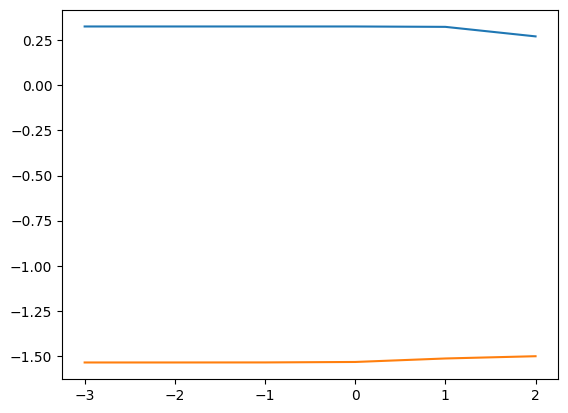

In [ ]:
t_l = []
tt_l = []
for i in [0.001, 0.01, 0.1, 1, 10, 100]:
    ridg = Ridge(alpha = i)
    ridg.fit(p_tr_x, tr_y)
    t_l.append(ridg.score(p_tr_x, tr_y))
    tt_l.append(ridg.score(p_tt_x, tt_y))
plt.plot([-3, -2, -1, 0, 1, 2], t_l)
plt.plot([-3, -2, -1, 0, 1, 2], tt_l)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
m1 = LinearRegression()
m2 = KNeighborsRegressor()
m3 = Lasso()
m4 = Ridge()
m5 = SGDRegressor()
m6 = DecisionTreeRegressor()

In [ ]:
tr_x.shape, tt_x.shape, tr_y.shape, tt_y.shape

((42, 3), (14, 3), (42,), (14,))

In [ ]:
hy = []
for m in [m1, m2, m3, m4, m5, m6]:
    m.fit(tr_x, tr_y)
    hy.append(m.score(tt_x, tt_y))
    print(m, ':', cross_val_score(tr_x, tr_y).mean())
#hy

In [ ]:
m1 = LinearRegression

[0.8407314517787836,
 0.9557580869312088,
 0.8395213054372954,
 0.8432352041718988,
 -4726192379875393.0,
 0.9747756202306459]